In [ ]:
# !pip install pillow --upgrade
# !pip install python-igraph
# !pip install graspologic
# !pip install networkx
# !pip install matplotlib
# !pip install torch_geometric
# !pip install torch-sparse -f https://pytorch-geometric.com/whl/torch-1.7.0+${CUDA}.html
# !pip install torch-scatter==latest+cu101 torch-sparse==latest+cu101 -f https://pytorch-geometric.com/whl/torch-1.7.0.html

In [ ]:
!cp drive/MyDrive/code/utils.py .
!cp drive/MyDrive/code/dataset.py .
!cp drive/MyDrive/code/model.py .
!cp drive/MyDrive/code/classifier.py .
# !cp drive/MyDrive/code/utils.py . 

In [1]:
from utils import *
from dataset import *
from model import *
from classifier import *

In [2]:
if torch.cuda.is_available():  
  dev = "cuda:0" 
else:  
  dev = "cpu"  
device = torch.device(dev)  

GraphicalLassoCV(alphas=[0.001, 0.002])
GraphicalLassoCV(alphas=[0.001, 0.002])
(31.92011690915843, 28.514805520072716)
19.278466596725945
50
50
50
50
50
50
50
50


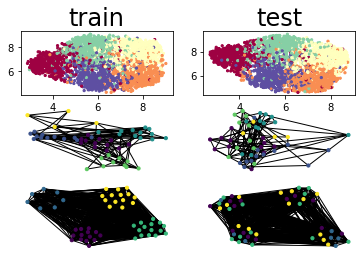

[0, 4, 0, 0, 1, 1, 0, 4, 2, 3, 4, 4, 3, 3, 1, 3, 0, 1, 1, 0, 1, 3, 1, 0, 4, 4, 3, 4, 2, 3, 3, 4, 3, 2, 3, 2, 0, 2, 4, 1, 0, 3, 4, 2, 3, 4, 0, 1, 4, 3, 0, 0, 3, 0, 4, 4, 1, 1, 4, 2, 1, 2, 3, 3, 2, 0, 4, 1, 1, 0, 1, 1, 0, 0, 3, 1, 2, 1, 1, 2, 0, 1, 4, 2, 0, 3, 0, 1, 3, 1, 3, 2, 3, 4, 3, 4, 1, 2, 1, 0, 4, 0, 3, 1, 1, 2, 1, 1, 4, 4, 3, 2, 3, 4, 3, 1, 3, 3, 3, 0, 4, 2, 3, 1, 1, 1, 4, 3, 3, 4, 3, 4, 2, 1, 3, 4, 4, 1, 1, 1, 3, 2, 0, 2, 2, 3, 0, 3, 4, 0, 3, 4, 4, 1, 4, 2, 0, 2, 3, 3, 3, 1, 4, 4, 4, 0, 2, 2, 4, 0, 0, 0, 1, 1, 0, 1, 3, 2, 0, 3, 3, 1, 4, 1, 4, 1, 4, 3, 4, 3, 2, 2, 2, 4, 0, 4, 1, 3, 0, 2, 2, 4, 2, 3, 4, 2, 3, 0, 2, 1, 0, 2, 0, 1, 0, 1, 1, 2, 1, 0, 1, 0, 3, 1, 0, 4, 3, 3, 2, 2, 4, 3, 1, 0, 1, 2, 0, 2, 2, 4, 2, 4, 1, 3, 1, 0, 4, 1, 1, 3, 2, 1, 4, 1, 4, 2, 3, 4, 0, 2, 4, 2, 0, 4, 4, 0, 3, 1, 3, 3, 2, 0, 4, 4, 0, 4, 0, 4, 3, 3, 2, 3, 1, 1, 3, 1, 1, 1, 1, 4, 4, 4, 2, 2, 0, 1, 3, 4, 2, 0, 0, 1, 2, 1, 3, 1, 2, 1, 0, 2, 4, 1, 2, 0, 0, 0, 2, 1, 0, 2, 1, 0, 2, 1, 3, 4, 3, 1, 0, 2, 3, 0, 1, 

In [3]:
dataset = Dataset(tag='EXP1')

dataset.create_syn(n_classes = 5, 
                   n_obs_train = 500, 
                   n_obs_test= 1000, 
                   n_features=50,
                   n_char_features = 10, 
                   signal =[3, 3], 
                   diff_coef=[.4, .4], 
                   noise = [.4, .4], 
                   n_communities = 5,
                   probs = [0.9, 0.1], 
                   n_iter=1, 
                   model ='ER')

dataset.create_graph(alphas=[0.001, 0.002])

print(dataset.score_graphs())

print(dataset.comp_test())

plt.subplot(321)
plot_lowDim(dataset.X_train, dataset.y_train, title='train')
plt.subplot(322)
plot_lowDim(dataset.X_train, dataset.y_train, title ='test')
plt.subplot(323)
comm = draw_graph(dataset.A_train)
plt.subplot(324)
_ = draw_graph(dataset.A_test, comm)
plt.subplot(325)
comm = draw_graph(dataset.Ah_train)
plt.subplot(326)
_ = draw_graph(dataset.Ah_test, comm)
plt.show()

train_dataloader = dataset._dataloader('train',use_true_graph=True,batch_size=16)
test_dataloader  = dataset._dataloader('test',use_true_graph=True,batch_size=16)

In [4]:
clf = Classifier(n_features=50,
        n_classes=5,
        n_hidden_GNN=[5],
        n_hidden_FC=[], #10
        dropout_FC=0.1, 
        K=1,
        classifier='GraphSAGE', 
        lr=.005, 
        momentum=.9,
        log_dir="runs/GNN")

clf.fit(train_dataloader, epochs = 30, test_dataloader=test_dataloader,verbose=True)

False
[1] loss: 0.752
[4] loss: 0.521
[7] loss: 0.520
[10] loss: 0.502
[13] loss: 0.476
[16] loss: 0.408
[19] loss: 0.434
[22] loss: 0.382
[25] loss: 0.393
[28] loss: 0.416


In [5]:
_ = clf.eval(train_dataloader, verbose=True)
_ = clf.eval(test_dataloader, verbose=True)

Accuracy: 0.908
Confusion Matrix:n [[490   1   1   3   5]
 [  3 445  20   1  31]
 [  0   6 486   2   6]
 [ 30  29  14 411  16]
 [  2  32  25   2 439]]
Precision: 0.911
Recall: 0.908
f1_score: 0.908
Accuracy: 0.789
Confusion Matrix:n [[878  29  16  25  52]
 [ 30 732 101  20 117]
 [  7  78 858  33  24]
 [105  82  58 684  71]
 [ 20  96  62  30 792]]
Precision: 0.792
Recall: 0.789
f1_score: 0.788


In [6]:
clf = Classifier(n_features=50,
        n_classes=5,
        n_hidden_GNN=[],
        n_hidden_FC=[],
        dropout_FC=0.1, 
        K=1,
        classifier='MLP', 
        lr=.005, 
        momentum=.9,
        log_dir="runs/MLP")
clf.fit(train_dataloader, epochs = 30, test_dataloader=test_dataloader,verbose=True)
_ = clf.eval(train_dataloader, verbose=True)
_ = clf.eval(test_dataloader, verbose=True)

True
[1] loss: 0.487
[4] loss: 0.314
[7] loss: 0.308
[10] loss: 0.310
[13] loss: 0.308
[16] loss: 0.308
[19] loss: 0.307
[22] loss: 0.306
[25] loss: 0.306
[28] loss: 0.306
Accuracy: 0.892
Confusion Matrix:n [[459  10   6  16   9]
 [  4 436  36   9  15]
 [  0  13 463  15   9]
 [  8   8  31 434  19]
 [  4  23  20  14 439]]
Precision: 0.894
Recall: 0.892
f1_score: 0.893
Accuracy: 0.867
Confusion Matrix:n [[885  25  13  47  30]
 [ 15 842  74  17  52]
 [  4  29 917  29  21]
 [ 33  31  57 842  37]
 [ 20  55  42  36 847]]
Precision: 0.868
Recall: 0.867
f1_score: 0.867
